In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader.data as web
from sklearn import covariance
import scipy.optimize
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()


In [3]:
tickers = [ 'FM', 'GLD', 'IFEU', 'IJR', 'JXI', 'PIN', 'TLT']
tickers.sort()
data=yf.download(tickers,start='2016-01-01', end='2018-12-30')['Adj Close']
n_assets=len(tickers)

[*********************100%%**********************]  7 of 7 completed


In [4]:
data.tail(4)

,FM,GLD,IFEU,IJR,JXI,PIN,TLT
Date,,,,,,,
2018-12-24,22.058521,120.019997,34.509998,59.788311,40.467892,18.585180,104.725769
2018-12-26,22.328451,119.660004,34.709999,62.569374,41.022591,18.878799,103.603615
2018-12-27,22.412806,120.570000,34.290001,62.945709,40.997372,18.989897,103.620857
2018-12-28,22.159746,121.059998,34.314201,63.239403,41.165466,19.196222,104.492683


In [7]:
# calculated the daily percentage change in returns
returns=data.pct_change().dropna()
# calculating historical covariance and annualizing 
covar_historical=returns.cov()*252
covar_historical


,FM,GLD,IFEU,IJR,JXI,PIN,TLT
FM,0.017332,0.000192,0.009423,0.010008,0.003995,0.011699,-0.002688
GLD,0.000192,0.015127,0.000051,-0.003735,0.000680,-0.000720,0.005704
IFEU,0.009423,0.000051,0.030934,0.012056,0.010523,0.014775,-0.001824
IJR,0.010008,-0.003735,0.012056,0.025910,0.006188,0.015106,-0.005905
JXI,0.003995,0.000680,0.010523,0.006188,0.013610,0.007839,0.002078
PIN,0.011699,-0.000720,0.014775,0.015106,0.007839,0.033106,-0.002961
TLT,-0.002688,0.005704,-0.001824,-0.005905,0.002078,-0.002961,0.011577


In [9]:
standard_deviations=returns.std()*np.sqrt(252)

Text(0.5, 1.0, 'Correlation')

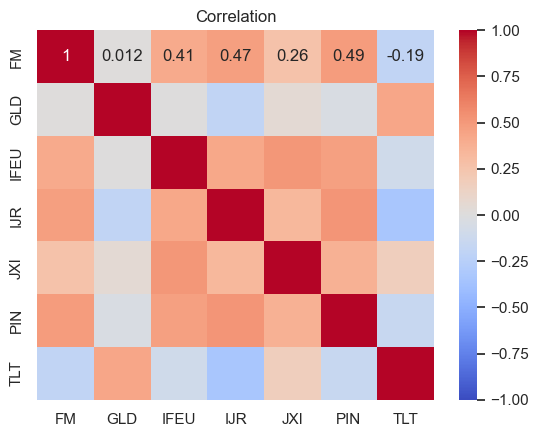

In [11]:
# visualizing the historical correlation amoung the assets
ax = plt.axes()
sns.heatmap(returns.corr(), vmin=-1, vmax=1,annot=True,cmap="coolwarm",robust=True)
ax.set_title('Correlation')

In [13]:
# covariance shrinkage using ledoit wolf covariance shrinkage approach
coovariance_shrunk=covariance.ledoit_wolf(returns)
covar=coovariance_shrunk[0]
covar=covar*252
df_covarianc=pd.DataFrame(covar,columns=tickers,index=tickers)
df_covarianc

,FM,GLD,IFEU,IJR,JXI,PIN,TLT
FM,0.017462,0.000184,0.009026,0.009587,0.003827,0.011206,-0.002575
GLD,0.000184,0.015350,0.000049,-0.003578,0.000652,-0.000690,0.005464
IFEU,0.009026,0.000049,0.030491,0.011548,0.010080,0.014153,-0.001747
IJR,0.009587,-0.003578,0.011548,0.025679,0.005928,0.014470,-0.005657
JXI,0.003827,0.000652,0.010080,0.005928,0.013897,0.007509,0.001991
PIN,0.011206,-0.000690,0.014153,0.014470,0.007509,0.032571,-0.002836
TLT,-0.002575,0.005464,-0.001747,-0.005657,0.001991,-0.002836,0.011950


In [15]:
covar_historical

,FM,GLD,IFEU,IJR,JXI,PIN,TLT
FM,0.017332,0.000192,0.009423,0.010008,0.003995,0.011699,-0.002688
GLD,0.000192,0.015127,0.000051,-0.003735,0.000680,-0.000720,0.005704
IFEU,0.009423,0.000051,0.030934,0.012056,0.010523,0.014775,-0.001824
IJR,0.010008,-0.003735,0.012056,0.025910,0.006188,0.015106,-0.005905
JXI,0.003995,0.000680,0.010523,0.006188,0.013610,0.007839,0.002078
PIN,0.011699,-0.000720,0.014775,0.015106,0.007839,0.033106,-0.002961
TLT,-0.002688,0.005704,-0.001824,-0.005905,0.002078,-0.002961,0.011577


In [17]:
# error between historical covariance and shrinked covariance
lw_errors = np.subtract(covar, covar_historical)
lw_errors

,FM,GLD,IFEU,IJR,JXI,PIN,TLT
FM,0.000130,-0.000008,-0.000397,-0.000421,-0.000168,-0.000493,0.000113
GLD,-0.000008,0.000223,-0.000002,0.000157,-0.000029,0.000030,-0.000240
IFEU,-0.000397,-0.000002,-0.000443,-0.000508,-0.000443,-0.000622,0.000077
IJR,-0.000421,0.000157,-0.000508,-0.000231,-0.000261,-0.000636,0.000249
JXI,-0.000168,-0.000029,-0.000443,-0.000261,0.000287,-0.000330,-0.000088
PIN,-0.000493,0.000030,-0.000622,-0.000636,-0.000330,-0.000534,0.000125
TLT,0.000113,-0.000240,0.000077,0.000249,-0.000088,0.000125,0.000372


In [19]:
# equal weights are assigned to all the assets
weights_initial=np.ones((n_assets,1))
weights_initial=weights_initial*1/n_assets

In [21]:
# risk aversion lambda 
lamda=1.12 # intentionally lambda is misspelt
pi=2*lamda*np.dot(covar,weights_initial)

In [23]:
weights=(1/(2*lamda))*np.dot(np.linalg.inv(covar),pi)

In [25]:
p1=np.array([0,-1,1,0,0,0,0])
p2=np.array([0,0,0,0,0,1,0])

In [27]:
P=np.array([p1,p2])
P

array([[ 0, -1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0]])

In [29]:
#the relative view is calculated as one standard deviation difference between the assets
relative_v1=standard_deviations['IFEU']-standard_deviations['GLD']
relative_v1

0.05288747460087119

In [31]:
# absolute view is one standard devaition of asset
absolute_v2=standard_deviations['PIN']
absolute_v2

0.18194932701450625

In [33]:
V=np.array([[relative_v1],[absolute_v2]])
V

array([[0.05288747],
       [0.18194933]])

In [35]:
tao=0.4 # Arbitrarily choosed tao as 0.4
omega=np.dot(P,np.dot(tao*covar,P.T))
omega=np.diag(np.diag(omega))

In [37]:
# Posterior calculations
a=np.dot(tao*covar,P.T)
b=np.linalg.inv(np.dot(tao*P,np.dot(covar,P.T))+omega)
c=V-np.dot(P,pi)
mu_BL=pi+np.dot(a,np.dot(b,c))
# we are going to use original covariance matrix instead of updated covariance matrix. We dont want disturb structored coovariance
#covar_BL=(1+tao)*covar-np.dot(np.dot(tao*a,b),np.dot(P,covar))
covar_BL=covar

In [39]:
# this function gives the optiomal weights with high sharp ratio budgeting. Used Sequential Least Squares Programming optimization (SLSQP)
def sharp_ratio_optimization(ret, covariance,lamda):    
    def sharp_ratio_f(W,ret, covariance,lamda):
        sharp_ratio=(((np.dot(W.T,ret)))/np.sqrt(lamda*np.dot(W.T,np.dot(covariance,W))))
        return 1/sharp_ratio
    b_ = [(0,1) for i in range(n_assets)]
    W = np.ones([n_assets])/n_assets
    c_ = ({'type':'eq', 'fun': lambda W: 1.-sum(W) })     
    result = scipy.optimize.minimize(sharp_ratio_f,W,(ret, covariance,lamda), method='SLSQP',
        constraints=c_,bounds=b_, tol=1e-10)
    return result

In [42]:
# this function gives the optiomal weights with mean variance budgeting. Used Sequential Least Squares Programming optimization (SLSQP)
def minVariance_optimization(ret, covariance,lamda):    
    def variance_optimization(W,ret, covariance,lamda):
        return lamda*np.dot(W.T,np.dot(covariance,W))    
    b_ = [(0,1) for i in range(n_assets)]
    W = np.ones([n_assets])/n_assets
    c_ = ({'type':'eq', 'fun': lambda W: 1.-sum(W) })     
    result = scipy.optimize.minimize(variance_optimization,W,(ret, covariance,lamda), method='SLSQP',
        constraints=c_,bounds=b_, tol=1e-10)
    return result

In [45]:
#this function gives the optimal weights for the targeted returns
def optimal_weights(ret, covariance,lamda,target_returns):    
    def weights_func(W,ret, covariance,lamda,target_returns):
        return np.abs(np.dot(W.T,ret)-target_returns)
    b_ = [(0,1) for i in range(n_assets)]
    W = np.ones([n_assets])/n_assets
    c_ = ({'type':'eq', 'fun': lambda W: 1.-sum(W) }) 
    result = scipy.optimize.minimize(weights_func,W,(ret, covariance,lamda,target_returns), method='SLSQP',
        constraints=c_,bounds=b_, tol=1e-10)
    return result

In [47]:
# this function gives weights compositions and its volatility for different possible targetted returns.
#make sure that we have to give weights input calculated from mean-variance weights optimization
def optimal_weights_volatality_array(Weights,returns,covar,lamda):
    m_weights=Weights.reshape((n_assets,1))
    min_return=np.dot(m_weights.T,returns)
    min_return=min_return.item(0)
    max_return=max(returns).item(0)
    no_iterations=20
    Targeted_returns=np.linspace(min_return,  max_return , no_iterations)
    portfolio_Weights=np.zeros((n_assets,no_iterations))
    portfolio_vol=np.zeros((1,no_iterations))
    for i in range(no_iterations):
        weights_opt=optimal_weights(returns, covar,lamda,Targeted_returns[i]).x
        portfolio_Weights[:,i]=weights_opt
        weights_opt=weights_opt.reshape((n_assets,1))  
        portfolio_vol[:,i]=np.sqrt(lamda*np.dot(weights_opt.T,np.dot(covar,weights_opt)))
    return portfolio_vol,portfolio_Weights

In [50]:
# min variance optimization with historical covariance and  equilibrium returns
output_MinV_naive_hist=minVariance_optimization(pi,covar_historical,lamda)
portfolio_vol_MinV_Naive_hist,MinV_Weights_Naive_hist=optimal_weights_volatality_array(output_MinV_naive_hist.x,pi,covar_historical,lamda)
# min variance optimization with shrunk ledoit wolf covariance   and  equilibrium returns
output_MinV_naive=minVariance_optimization(pi,covar,lamda)
portfolio_vol_MinV_Naive,MinV_Weights_Naive=optimal_weights_volatality_array(output_MinV_naive.x,pi,covar,lamda)
# min variance optimization with shrunk ledoit wolf covariance   and  BlackLitterman returns
output_MinV_BL=minVariance_optimization(mu_BL,covar_BL,lamda)
portfolio_vol_MinV_BL,MinV_Weights_BL=optimal_weights_volatality_array(output_MinV_BL.x,mu_BL,covar,lamda)

In [52]:
# function to get the graph of volatility and composed weights
def plot_area_graph(Variance,Weights,xlabel,ylabel,title):
    x=Variance.flatten().tolist()
    y=Weights.tolist()
    plt.stackplot(x,y ,labels=tickers)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

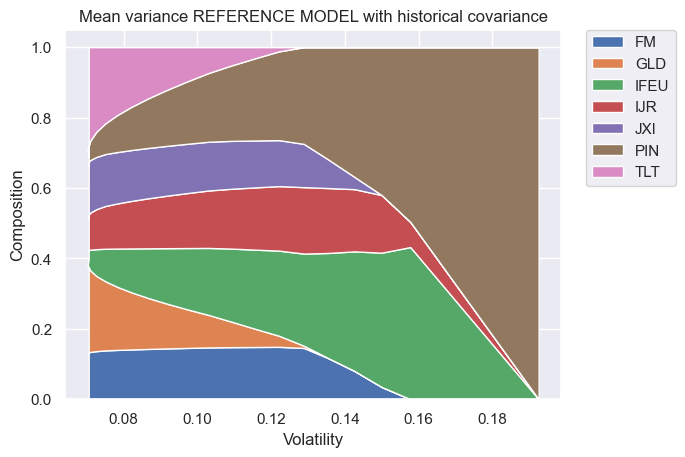

In [54]:
plot_area_graph(portfolio_vol_MinV_Naive_hist,MinV_Weights_Naive_hist,'Volatility','Composition','Mean variance REFERENCE MODEL with historical covariance')

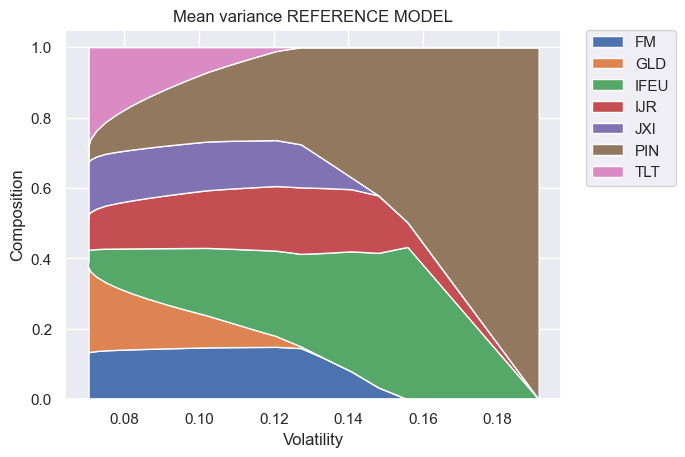

In [56]:
plot_area_graph(portfolio_vol_MinV_Naive,MinV_Weights_Naive,'Volatility','Composition','Mean variance REFERENCE MODEL')

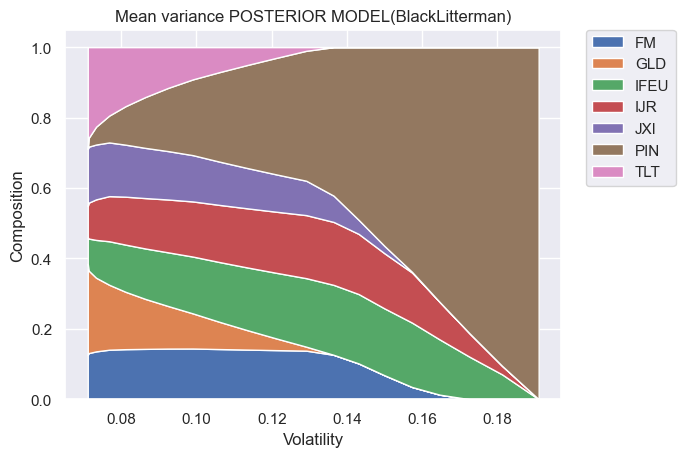

In [58]:
plot_area_graph(portfolio_vol_MinV_BL,MinV_Weights_BL,'Volatility','Composition','Mean variance POSTERIOR MODEL(BlackLitterman)')

In [60]:
# max sharp ratio optimization with shrunk ledoit wolf covariance   and  equilibrium returns
output_sharp_Naive=sharp_ratio_optimization(pi,covar,lamda)
portfolio_vol_sharp_Naive,Sharp_Weights_Naive=optimal_weights_volatality_array(output_sharp_Naive.x,pi,covar,lamda)

In [62]:
# max sharp ratio optimization with shrunk ledoit wolf covariance   and  BlackLitterman returns
output_sharp_BL=sharp_ratio_optimization(mu_BL,covar,lamda)
weights_sharp_BL=output_sharp_BL.x
portfolio_vol_sharp_BL,Sharp_Weights_BL=optimal_weights_volatality_array(output_sharp_BL.x,pi,covar,lamda)

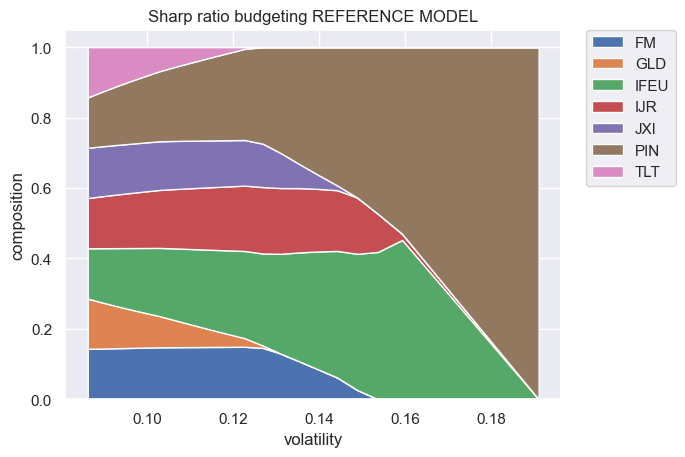

In [64]:
plot_area_graph(portfolio_vol_sharp_Naive,Sharp_Weights_Naive,'volatility','composition','Sharp ratio budgeting REFERENCE MODEL')

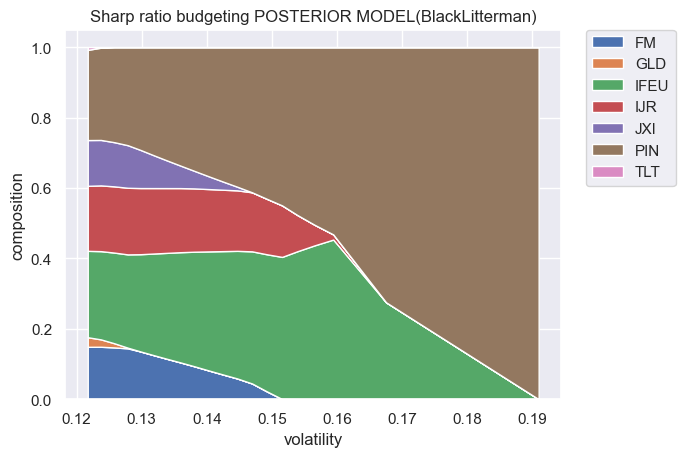

In [66]:
plot_area_graph(portfolio_vol_sharp_BL,Sharp_Weights_BL,'volatility','composition','Sharp ratio budgeting POSTERIOR MODEL(BlackLitterman)')

In [68]:
# creating arrray of lambdas from 0.056 to 11.2
range_of_lamda=np.linspace(lamda*0.05,lamda*10,100)  

In [70]:
# function to find how the volatility changes as the risk aversion changes (lambda) 
def riskaversion_volatility(range_of_lamda,covar,weights_initial,V,P,omega,tao):
    n_iterations=len(range_of_lamda)
    MV_Weights=np.zeros((n_assets,n_iterations))
    portfolio_returns=np.zeros((1,n_iterations))
    portfolio_vol=np.zeros((1,n_iterations))
    for i in range(n_iterations):
        lamda_temp=range_of_lamda[i]
        pi=2*lamda_temp*np.dot(covar,weights_initial)
        weights=(1/(2*lamda_temp))*np.dot(np.linalg.inv(covar),pi)
        a=np.dot(tao*covar,P.T)
        b=np.linalg.inv(np.dot(tao*P,np.dot(covar,P.T))+omega)
        c=V-np.dot(P,pi)
        mu_BL=pi+np.dot(a,np.dot(b,c))
        weights_opt=minVariance_optimization(mu_BL,covar,lamda_temp).x
        MV_Weights[:,i]=weights_opt
        weights_opt=weights_opt.reshape((n_assets,1))  
        portfolio_returns[:,i]=np.dot(weights_opt.T,mu_BL)
        portfolio_vol[:,i]=np.sqrt(lamda_temp*np.dot(weights_opt.T,np.dot(covar,weights_opt)))
    return range_of_lamda,portfolio_vol

In [72]:
range_of_lamda,portfolio_vol_lamda=riskaversion_volatility(range_of_lamda,covar,weights_initial,V,P,omega,tao)

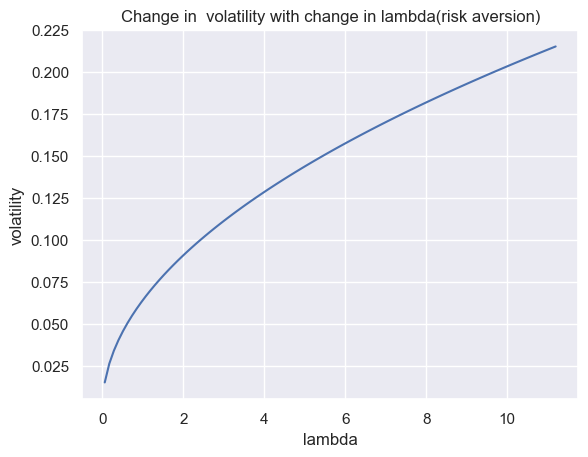

In [74]:
x=range_of_lamda.flatten().tolist()
y=portfolio_vol_lamda.flatten().tolist()
plt.plot(x,y)
plt.xlabel('lambda')
plt.ylabel('volatility')
plt.title('Change in  volatility with change in lambda(risk aversion)')
plt.show()

In [76]:
Weights_MinV_BL=output_MinV_BL.x.reshape((n_assets,1))
summary_arr=np.concatenate((mu_BL,pi,Weights_MinV_BL,weights_initial), axis=1)
Summary_Table_MinV_BL = pd.DataFrame(data=summary_arr, index=tickers)
Summary_Table_MinV_BL.columns =['E[R]','PI','New Weights MV','Initial weights']
Summary_Table_MinV_BL['Diff E[R]-PI']=Summary_Table_MinV_BL['E[R]']-Summary_Table_MinV_BL['PI']
Summary_Table_MinV_BL['New Weights MV \t-Initial weights']=Summary_Table_MinV_BL['New Weights MV']-Summary_Table_MinV_BL['Initial weights']
Summary_Table_MinV_BL.loc['Total'] = pd.Series(Summary_Table_MinV_BL.sum())
Summary_Table_MinV_BL.iloc[[-1], [0,1,4]]=' '
Summary_Table_MinV_BL

,E[R],PI,New Weights MV,Initial weights,Diff E[R]-PI,New Weights MV \t-Initial weights
FM,0.042615,0.015589,1.658210e-01,0.142857,0.027026,2.296387e-02
GLD,0.004078,0.005578,1.729554e-01,0.142857,-0.0015,3.009826e-02
IFEU,0.057471,0.023552,2.893067e-03,0.142857,0.033919,-1.399641e-01
IJR,0.053408,0.018552,1.768805e-01,0.142857,0.034856,3.402340e-02
JXI,0.032114,0.014043,1.134387e-01,0.142857,0.018071,-2.941845e-02
PIN,0.103114,0.024443,2.541099e-20,0.142857,0.078671,-1.428571e-01
TLT,-0.004677,0.002109,3.680113e-01,0.142857,-0.006785,2.251541e-01
Total,,,1.000000e+00,1.000000,,5.551115e-17


In [78]:
Weights_SR_BL=output_sharp_BL.x.reshape((n_assets,1))
summary_arr=np.concatenate((mu_BL,pi,Weights_SR_BL,weights_initial), axis=1)
Summary_Table_SR_BL = pd.DataFrame(data=summary_arr, index=tickers)
Summary_Table_SR_BL.columns =['E[R]','PI','New Weights SR','Initial weights']
Summary_Table_SR_BL['Diff E[R]-PI']=Summary_Table_SR_BL['E[R]']-Summary_Table_SR_BL['PI']
Summary_Table_SR_BL['New Weights SR -Initial weights']=Summary_Table_SR_BL['New Weights SR']-Summary_Table_SR_BL['Initial weights']
Summary_Table_SR_BL.loc['Total'] = pd.Series(Summary_Table_SR_BL.sum())
Summary_Table_SR_BL.iloc[[-1], [0,1,4]]=' '
Summary_Table_SR_BL

,E[R],PI,New Weights SR,Initial weights,Diff E[R]-PI,New Weights SR -Initial weights
FM,0.042615,0.015589,0.068666,0.142857,0.027026,-0.074191
GLD,0.004078,0.005578,0.071038,0.142857,-0.0015,-0.071819
IFEU,0.057471,0.023552,0.066291,0.142857,0.033919,-0.076566
IJR,0.053408,0.018552,0.068663,0.142857,0.034856,-0.074195
JXI,0.032114,0.014043,0.068662,0.142857,0.018071,-0.074195
PIN,0.103114,0.024443,0.588016,0.142857,0.078671,0.445159
TLT,-0.004677,0.002109,0.068664,0.142857,-0.006785,-0.074193
Total,,,1.000000,1.000000,,0.000000
